In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import qsonar.load

from typing import List, Tuple

In [2]:
# Load the data
data = qsonar.load.load_data_from_internet()

In [3]:
def print_cumpca(data: pd.DataFrame) -> None:
    # Prints the cumulative explained variance of PCA
    pca = PCA()
    pca.fit(data)
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
    for i, cv in enumerate(cumulative_variance):
        print(f"{i+1}th component: {cv:.4f}")

def plot_pca(data: pd.DataFrame, hlines: List[Tuple[int, str, str]]  = None) -> None: 
    """
    Plot the PCA explained variance and cumulative explained variance
    :param data: data to be used for PCA
    :param hlines: (xth component, color, label) horizontal lines to be plotted at xth component
    :return: 
    """
    pca = PCA()
    pca.fit(data)
    plt.figure(figsize=(10, 6))
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
    
    plt.bar(
        range(1,len(pca.explained_variance_)+1),
        pca.explained_variance_,
        label="Variance of PC"
        )
    
    if hlines is not None:
        for hline in hlines:
            x, color, label = hline
            plt.axvline(x=x, color=color, linestyle='dashed', label=f"{label:<5} - {x:>3}th - {cumulative_variance[x-1]:.2f}")
            
    
    plt.axhline(y=1, color='black', linestyle='dotted')
    
    plt.plot(cumulative_variance, 'r-', label="Cumulative variance")
    
    plt.title("Cumulative explained variance")
    plt.ylabel("Explained variance")
    plt.xlabel("Principal components")
    plt.legend()
    
    plt.ylim(0, 1.2)
    plt.show()

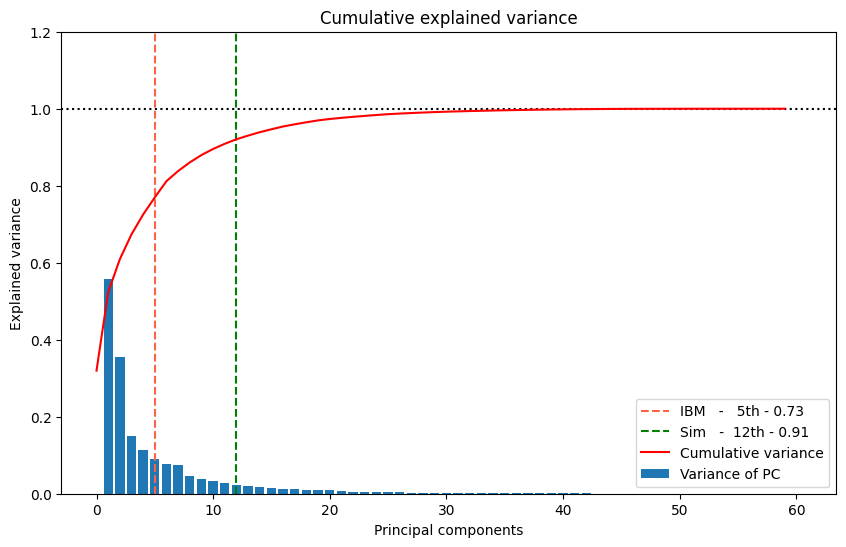

In [4]:
plot_pca(data.iloc[:, :-1], 
            (
                (5, "tomato", "IBM"), 
                (12, "green", "Sim")
            )
         )

In [5]:
print_cumpca(data.iloc[:, :-1])

1th component: 0.3197
2th component: 0.5235
3th component: 0.6091
4th component: 0.6737
5th component: 0.7253
6th component: 0.7698
7th component: 0.8119
8th component: 0.8383
9th component: 0.8606
10th component: 0.8798
11th component: 0.8954
12th component: 0.9090
13th component: 0.9207
14th component: 0.9303
15th component: 0.9390
16th component: 0.9467
17th component: 0.9539
18th component: 0.9595
19th component: 0.9648
20th component: 0.9697
21th component: 0.9733
22th component: 0.9763
23th component: 0.9790
24th component: 0.9814
25th component: 0.9837
26th component: 0.9858
27th component: 0.9874
28th component: 0.9888
29th component: 0.9901
30th component: 0.9913
31th component: 0.9923
32th component: 0.9932
33th component: 0.9939
34th component: 0.9947
35th component: 0.9954
36th component: 0.9960
37th component: 0.9966
38th component: 0.9971
39th component: 0.9976
40th component: 0.9980
41th component: 0.9984
42th component: 0.9987
43th component: 0.9990
44th component: 0.99